# Galerkin Finite Element for the Poisson Equation on a Unit Bar

Solves the Poisson equation $- \frac{d^2 \, u}{dx^2} = f$ on the unit bar domain $\Omega=(0,1)$ supplied with the homogeneous Dirichlet boundary condition $u(x=0) = 0$ in the left end-point and the non-homogeneous Neumann boundary condition $u(x=1) = \alpha$ in the right end-point. 

This version initialize the coefficient matrix as a dense matrix and assembles the matrix by a triple for-loop.

## Import Packages

In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings

## One-Dimensional Finite Element Code

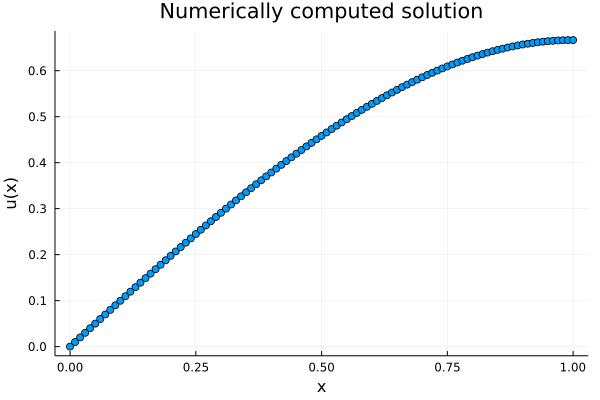

In [12]:
#..Construct an uniform mesh with N elements and mesh size h=1/N
#..Vector x holds the mesh points 
N = 100; Np1 = N+1; h = 1/N; h2=h*h; 
x = Vector(0:h:1); 

#..Mesh with edges and points
#..edges: numelem long list containing local-to-global mapping or connectivity information of each element 
#..points: numelem long list containing left and right node of each element
#..both points and edges are stored as list that are iterable 
edges = collect( [i, i+1] for i in 1:length(x)-1); 
points = collect( [x[i], x[i+1]] for i in 1:length(x)-1) 

#..Set the inline source function and the value of alpha 
fsource(x) = x
alpha = 0; 

#..define local or element matrix and right-hand side vector..
Aloc = collect([1 -1; -1 1]*(1/(xr-xl)) for (xl,xr) in points);
floc = collect([fsource(xl) fsource(xr)]*(xr-xl) for (xl,xr) in points);

#..Initialize coefficient matrix and right-hand side vector to zero  
A = zeros(length(x), length(x)); 
f = zeros(length(x), 1); 

#..Assemble coefficient matrix and right-hand side vector by loop over the elements 
for i=1:length(edges) for j=1:2 for k =1:2 A[edges[i][j], edges[i][k]] += Aloc[i][j,k]; end end end; 
for i=1:length(edges) for j=1:2 f[edges[i][j]] += floc[i][j]; end end; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1; A[1,2] = 0; f[1]     = 0; 
f[end] += alpha 
    
#..solve the linear system
u = A \ f; 

#..plot the solution  
p1=plot(x,u,shape=:circle,lw=2,legend=false)
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically computed solution")

In [ ]:
#..1D Finite element solver 
using LinearAlgebra
using Plots

#..construct the mesh
N = 100; Np1 = N+1; h = 1/N; h2=h*h; 
x = Vector(0:h:1); 

#..Mesh with edges and points
points = collect( [x[i], x[i+1]] for i in 1:length(x)-1) #..we deliberately choose to have arrays per element 
edges = collect( [i, i+1] for i in 1:length(x)-1); 
#..mesh = collect(edges, points); #..need to be revised 

#..Set the source function 
fsource(x) = x*(x-1); 

Aloc = collect([1 -1; -1 1]*(1/(xr-xl)) for (xl,xr) in points);
floc = collect([fsource(xl) fsource(xr)]*(xr-xl) for (xl,xr) in points);

A = zeros(length(x), length(x)); 
f = zeros(length(x), 1); 

for i=1:length(edges) for j=1:2 for k =1:2 A[edges[i][j], edges[i][k]] += Aloc[i][j,k]; end end end; 
for i=1:length(edges) for j=1:2 f[edges[i][j]] += floc[i][j]; end end; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;                 A[1,2] = 0;            f[1]     = 0; 
# A[end,end-1]=-1; A[end,end] = 1;       f[end] = 10;  

#..solve the linear system
u = A \ f; 

#..plot the solution  
plot(x,u)
